## Initial value problems

### with interval arithmetic

In [9]:
using IntervalArithmetic
using DifferentialEquations
using Plots
include("fnc.jl");

In [76]:
function myeuler(df, t0, x0, h, n) # derivative, initial conditions, step size, number of steps
    t = t0 .+ h .* (0:n)
    f = zeros(typeof(x0), n+1)
    f[1] = x0
    for i in 1:n
        f[i+1] = f[i] + df(f[i]) * h
    end
    t, f
end

myeuler (generic function with 1 method)

In [77]:
function logistic(u, p, t) 
    r, k = p
    r*u*(1-u/k)
end
t_span = (0.0, 10.0)
p = [ 1.2, 50.0 ]
u0 =  1.0  
ivp_logistic = ODEProblem(logistic, u0, t_span, p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 1.0

In [78]:
t_logistic, u_logistic = rk4(ivp_logistic, 1000)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.91, 9.92, 9.93, 9.94, 9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0], [1.0, 1.0118279872693363, 1.023792952761366, 1.0358964132871615, 1.04813990080098, 1.0605249625116053, 1.0730531609934895, 1.0857260742976576, 1.0985452960623454, 1.111512435623333  …  49.98323550532559, 49.98343541078277, 49.98363293328079, 49.983828101207045, 49.9840209426112, 49.9842114852092, 49.98439975638722, 49.98458578320558, 49.98476959240264, 49.984951210398584])

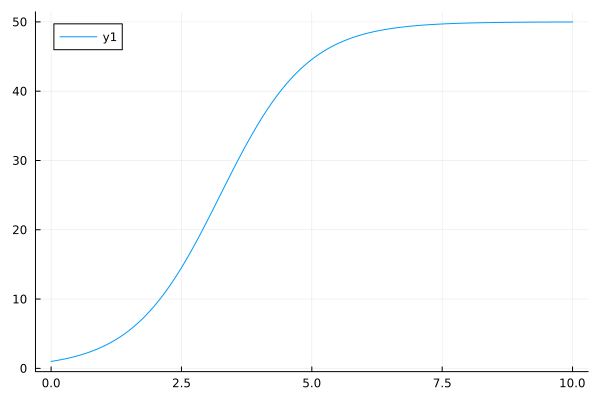

In [79]:
plot(t_logistic, u_logistic)

In [80]:
u0 = 1.0 ± 0.0001
ivp_interval = ODEProblem(logistic, u0, t_span, p)
t_interval, u_interval = rk4(ivp_interval, 100)

([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000001, 9.8, 9.9, 10.0], Interval{Float64}[[0.999899, 1.00011], [1.12451, 1.12475], [1.26426, 1.26452], [1.42087, 1.42116], [1.59624, 1.59657], [1.79245, 1.79283], [2.01179, 2.01221], [2.25671, 2.25718], [2.52987, 2.5304], [2.83413, 2.83473]  …  [43.8735, 56.047], [42.995, 56.9357], [41.9692, 57.9704], [40.7658, 59.1816], [39.3464, 60.6081], [37.6608, 62.3], [35.643, 64.3233], [33.2041, 66.767], [30.2216, 69.754], [26.5212, 73.4582]])

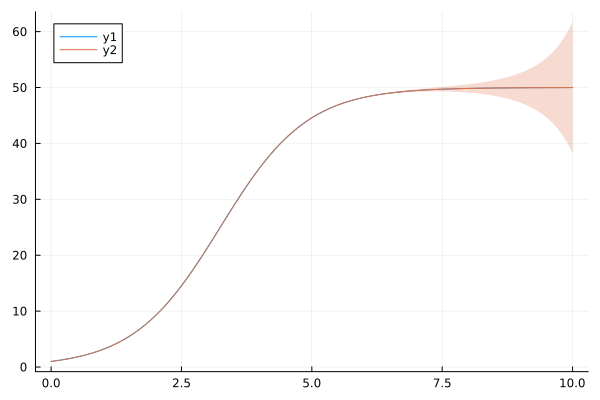

In [81]:
plot(t_interval, mid.(u_interval))
plot!(t_interval, mid.(u_interval), ribbon = radius.(u_interval)/2, fillalpha = 0.25 )
# plot!(t_interval, mid.(u_interval) .- radius.(u_interval)/2 )

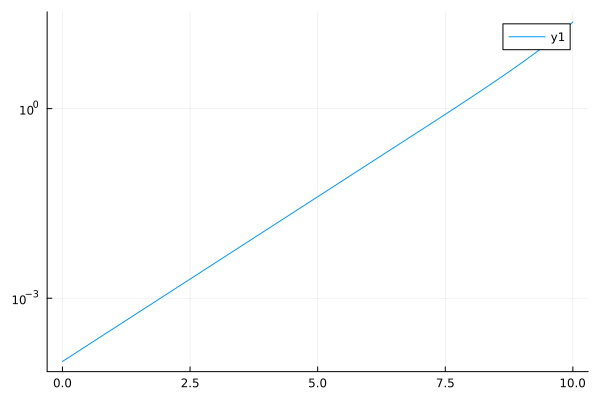

In [82]:
plot(t_interval, radius.(u_interval), yscale = :log10)

Try an interval for $r$ or $k$. Doesn't work (intervals not supported) for ODEProblem. 

Fall back to my_euler function. (Could write my_rk4 function.)

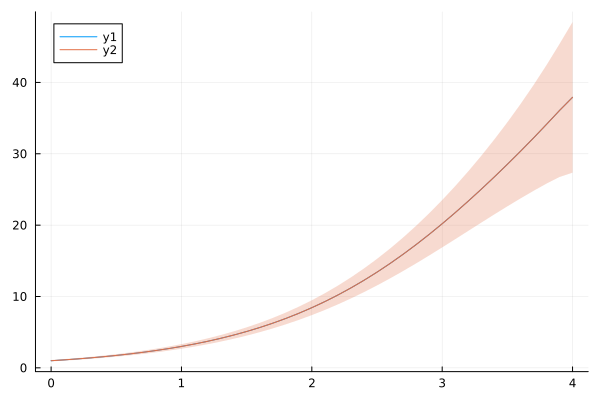

In [127]:
# u0 =  @interval 1.0  
u0 = 0.8 .. 1.2
function logistic2(u) 
    r = 1.2 ± 0.01
    k = 50.0
    r*u*(1-u/k)
end
t_interval, u_interval = myeuler(logistic2, 0.0, u0, 0.1, 40)
plot(t_interval, mid.(u_interval))
plot!(t_interval, mid.(u_interval), ribbon = radius.(u_interval)/2, fillalpha = 0.25 )
# plot!(t_interval, mid.(u_interval) .- radius.(u_interval)/2 )

In [128]:
# Simplified RK4 for autonomous functions (f does not depend on t)
function myrk4(df, t0, x0, h, n) # derivative, initial conditions, step size, number of steps
    t = t0 .+ h .* (0:n)
    f = zeros(typeof(x0), n+1)
    f[1] = x0
    for i in 1:n
        k₁ = h*df( f[i]     )
        k₂ = h*df( f[i]+k₁/2)
        k₃ = h*df( f[i]+k₂/2)
        k₄ = h*df( f[i]+k₃  )
        f[i+1] = f[i] + (k₁ + 2(k₂+k₃) + k₄)/6
    end
    t, f
end

myrk4 (generic function with 1 method)

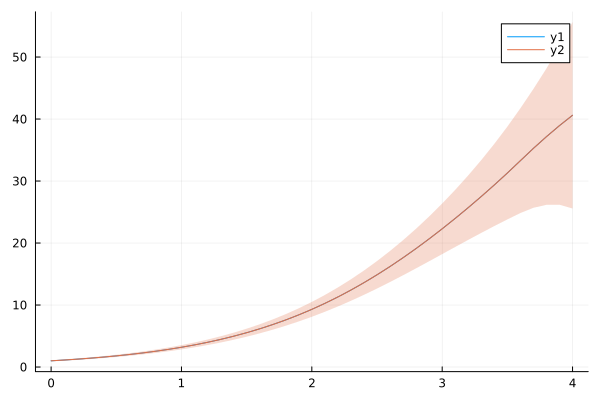

In [133]:
t_interval_rk4, u_interval_rk4 = myrk4(logistic2, 0.0, u0, 0.1, 40)
plot(t_interval_rk4, mid.(u_interval_rk4))
plot!(t_interval_rk4, mid.(u_interval_rk4), ribbon = radius.(u_interval_rk4)/2, fillalpha =0.25 )
# plot!(t_interval, mid.(u_interval), label = "Euler")
# plot!(t_interval, mid.(u_interval), ribbon = radius.(u_interval)/2, fillalpha = 0.25, label ="Euler" )

## Find the functional form of an IVP from data

### Lorentz system

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


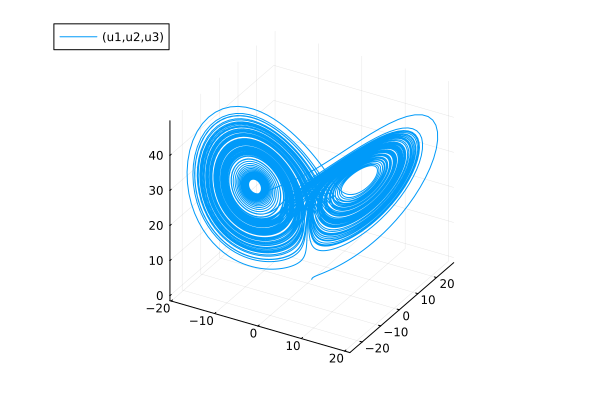

In [51]:
function lorenz!(du,u,p,t)
 du[1] = 10.0(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob, Tsit5())
plot(sol,vars=(1,2,3))